In [7]:
import math
import collections
import itertools

# Algorithms

### Prefix Sum

In [99]:
arr = [1, 2, 3, 4, 5]                          # given array
acc = [0] + list(itertools.accumulate(IR))     # each element contains SUM of all PREVIOUS entries in 'arr'
print('Original array:', arr)
print('Prefix sum arr:', acc)

Original array: [1, 2, 3, 4, 5]
Prefix sum arr: [0, 1, 3, 6, 10, 15]


In [ ]:
start, end = 1, 4      # both inclusive
sum_subarr = acc[end+1] - acc[start]
sum_subarr

### Leader

Find the leader in the array. Leader is element that occurs more than n/2 times.

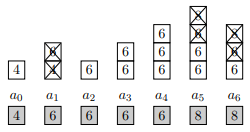

Notice that if the sequence a0, a1,...,an≠1 contains a leader, then after removing a pair of elements of dierent values, the remaining sequence still has the same leader. Let’s create an empty stack onto which we will be pushing consecutive elements. After each such operation we check whether the two elements at the top of the stack are dierent. If they are, we remove them from the stack. In fact, we don’t need to remember all the elements from the stack, because all the values
below the top are always equal. It is sucient to remember only the values of elements and the size of the stack.

Link: [https://codility.com/media/train/6-Leader.pdf](https://codility.com/media/train/6-Leader.pdf)

In [35]:
A = [6, 8, 4, 6, 8, 6, 6]

In [39]:
def goldenLeader(A):
    n = len(A)
    size = 0
    
    for k in range(n):
        if (size == 0):
            size += 1
            value = A[k]
        else:
            if (value != A[k]):
                 size -= 1
            else:
                 size += 1
    
    candidate = -1
    if (size > 0):
        candidate = value
    
    leader = -1
    count = 0
    
    for k in range(n):
        if (A[k] == candidate):
            count += 1
    if (count > n // 2):
        leader = candidate
    
    return leader

In [40]:
goldenLeader(A)

6

### Maximum Subarray

In [1]:
A = [-2, -3, 4, -1, -2, -1, 5, -3]
A = [3, 2, -6, 4, 0]

In [2]:
def solution(A):
    max_ending_here = -1000000
    max_so_far = -1000000
    
    for a in A:
        max_ending_here = max(max_ending_here + a, a)
        max_so_far = max(max_so_far, max_ending_here)
        
    
    return max_so_far

In [3]:
max_subarray(A)

5

# 10. Prime and composite numbers

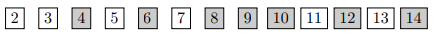
<center>Prime Numbers</center>

### Counting divisors

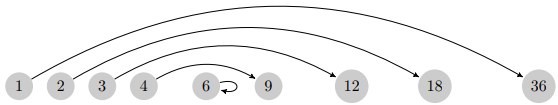
<center>Counting divisors</center>


Thus, iterating through all the numbers from $1$ to $\sqrt{n}$ allows us to find all the divisors. If number n is of the form $k^2$, then the symmetric divisor of $k$ is also $k$. This divisor should be counted just once.

In [1]:
def divisors(n):
    i = 1
    result = 0
    while (i * i < n):
        if (n % i == 0):
            result += 2
        i += 1
    if (i * i == n):
        result += 1
    return result

### Primality Test

Check number of divisors, if other than two, then not prime

In [3]:
def primality(n):
    i = 2
    while (i * i <= n):
        if (n % i == 0):
            return False
        i += 1
    return True

### Flip Coins

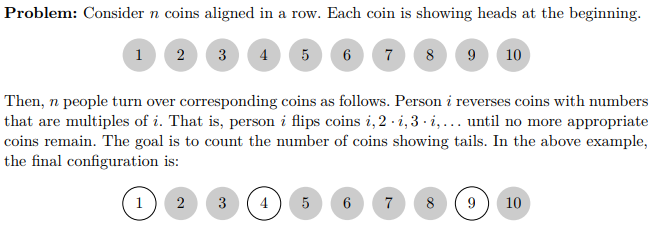

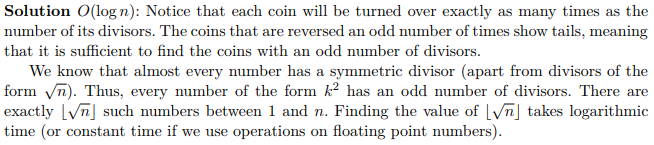

### Exercise: Flags

In [ ]:
def get_peaks(A):
    peaks = [False] * len(A)
    for i in range(1, len(A)-1):
        if A[i-1] < A[i] > A[i+1]:
            peaks[i] = True
    return peaks

def get_next_peaks(A):
    peaks = get_peaks(A)
    nexts = [None] * len(A)
    for i in range(len(A)-2, -1, -1):
        if peaks[i]:
            nexts[i] = i
        else:
            nexts[i] = nexts[i+1]
    return nexts

def how_many_flags(carry_flags, nexts, A):
    flags_planted = 0
    
    i = 0
    while i < len(A):
        i = nexts[i]  # teleport to next flag

        if i is None:
            break

        flags_planted += 1
        
        if flags_planted == carry_flags:
            break
        
        i += carry_flags
    
    return flags_planted

def solution(A):
    
    nexts = get_next_peaks(A)
    
    max_flags_so_far = 0
    max_possible_flags = math.ceil(math.sqrt(len(A)))
    
    for carry_flags in range(1, max_possible_flags+1):
        
        flags_planted = how_many_flags(carry_flags, nexts, A)
        
        if flags_planted > max_flags_so_far:
            max_flags_so_far = flags_planted
            
    return max_flags_so_far

AA = [1, 5, 3, 4, 3, 4, 1, 2, 3, 4, 6, 2]
AA = [0, 1, 0, 0, 1, 0, 0, 1, 0]
solution(AA)

# 11. Sieve of Eratosthenes

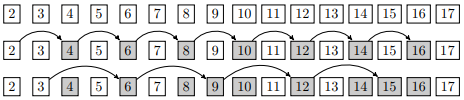

Note:
* need to check divisors only up to $\sqrt{n}$, anything above that will be composite with second component less than $\sqrt{n}$
* only need to cross multiples of $i$ which are greater than $i^2$ because lower multiples have form $k\cdot i$ where $k < i$ and would be crossed out by prime divisors of $k$ anyway

In [11]:
def sieve(n):
    sieve = [True] * (n + 1)
    sieve[0] = sieve[1] = False
    i=2
    while (i * i <= n):
        if (sieve[i]):
            k=i * i
            while (k <= n):
                sieve[k] = False
                k += i
        i += 1
    return sieve

In [19]:
bool_arr = sieve(31)
print([i for i, v in enumerate(bool_arr) if v])

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31]


### Factorization

Modify sieve algorithm to record smallest prime factor for each $n$

In [20]:
def arrayF(n):
    F = [0] * (n + 1)
    i=2
    while (i * i <= n):
        if F[i] == 0:
            k = i * i
            while (k <= n):
                if F[k] == 0:
                    F[k] = i
                k += i
        i += 1
    return F

In [22]:
print(arrayF(31))

[0, 0, 0, 0, 2, 0, 2, 0, 2, 3, 2, 0, 2, 0, 2, 3, 2, 0, 2, 0, 2, 3, 2, 0, 2, 5, 2, 3, 2, 0, 2, 0]


In [25]:
def factorization(x, F):
    primeFactors = []
    while F[x] > 0:
        primeFactors.append(F[x])
        x //= F[x]
    primeFactors.append(x)
    return primeFactors

In [29]:
factorization(33, arrayF(33))

[3, 11]

### Exercise: CountSemiprimes

In [11]:
import itertools

def arrayF(n):
    F = [0] * (n + 1)
    i=2
    while (i * i <= n):
        if F[i] == 0:
            k = i * i
            while (k <= n):
                if F[k] == 0:
                    F[k] = i
                k += i
        i += 1
    return F


def semiprimes(F):
    S = [0] * len(F)
    for x, f in enumerate(F):
        if f != 0:  # x is not prime
            first_divisor = f    # first divisor is prime
            other_divisor = x // first_divisor
            if F[other_divisor] == 0:  # other divisor is prime as well!
                # found semiprime
                S[x] = 1
    return S


def solution(N, P, Q):
    F = arrayF(N)      # smallest prime factors up to N
    S = semiprimes(F)  # semiprimes up to N
    prefix_sum = [0] + list(itertools.accumulate(S))
    
    result = []
    for i in range(len(P)):
        start, end = P[i], Q[i]      # both inclusive
        sum_subarr = prefix_sum[end+1] - prefix_sum[start]
        result.append(sum_subarr)
        
    return result

In [15]:
N = 26
P = [ 1,  4, 16]
Q = [26, 10, 20]
result = solution(N, P, Q)
print(result)

[10, 4, 0]


# 12. Euclidean algorithm

In [16]:
def gcd(a, b):
    if a % b == 0:
        return b
    else:
        return gcd(b, a % b)

In [18]:
gcd(18, 24)

6

Very fast version

In [21]:
def gcd(a, b, res=1):
    if a == b:
        return res * a
    elif (a % 2 == 0) and (b % 2 == 0):
        return gcd(a // 2, b // 2, 2 * res)
    elif (a % 2 == 0):
        return gcd(a // 2, b, res)
    elif (b % 2 == 0):
        return gcd(a, b // 2, res)
    elif a > b:
        return gcd(a - b, b, res)
    else:
        return gcd(a, b - a, res)

In [22]:
gcd(18, 24)

6

In [25]:
def lcm(a, b):
    return (a * b) // gcd(a, b)

In [28]:
lcm(6, 9)

18

# 13. Fibonacci Numbers

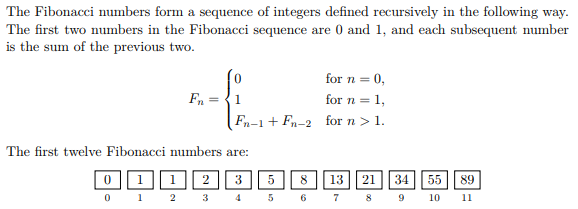

In [63]:
def fibonacciDynamic(n):
    fib = [0] * (n + 1)
    fib[1] = 1
    for i in range(2, n + 1):
        fib[i] = fib[i - 1] + fib[i - 2]
    return fib

Note: Faster algorithms exist

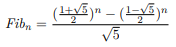

# 14. Binary Search

In [99]:
def binarySearch(A, x):
    n = len(A)
    beg = 0
    end = n - 1
    result = -1
    while (beg <= end):
        mid = (beg + end) // 2
        if (A[mid] <= x):
            beg = mid + 1
            result = mid
        else:
            end = mid - 1
    return result

In [100]:
#     0   1   2   3   4   5   6   7   8
A = [12, 15, 15, 19, 24, 31, 53, 59, 60]

In [103]:
binarySearch(A, 52)

5

# 15. Caterpillar Method

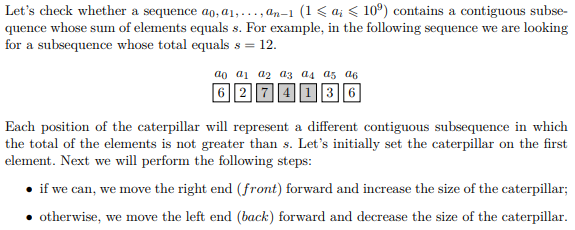

In [105]:
def caterpillarMethod(A, s):
    """Check if A contains contious subarray that sums to s"""
    n = len(A)
    front, total = 0, 0
    for back in range(n):
        while (front < n and total + A[front] <= s):
            total += A[front]
            front += 1
        if total == s:
            return True
        total -= A[back]
    return False

In [111]:
AA = [1, 5, 1, 5, 1, 5, 1]

In [115]:
caterpillarMethod(AA, 4)

False

# 16. Greedy Algorithms

Greedy programming is a method by which a solution is determined based on making the locally optimal choice at any given moment. Depending on the problem, the greedy method of solving a task may or may not be the best approach.

In [117]:
def greedyCoinChanging(M, k):
    n = len(M)
    result = []
    for i in range(n - 1, -1, -1):
        result += [(M[i], k // M[i])]
        k %= M[i]
    return result

In [118]:
M = [1, 2, 5, 10]
greedyCoinChanging(M, 12)

[(10, 1), (5, 0), (2, 1), (1, 0)]

# 17. Dynamic Programming

In [125]:
def dynamic_coin_changing(C, k):
    n = len(C)
    dp = [0] + [1000] * k
    for i in range(1, n + 1):
        for j in range(C[i - 1], k + 1):
            dp[j] = min(dp[j - C[i - 1]] + 1, dp[j])
    return dp

# Exercises

### NumberOfDiscIntersections (Lesson 6)

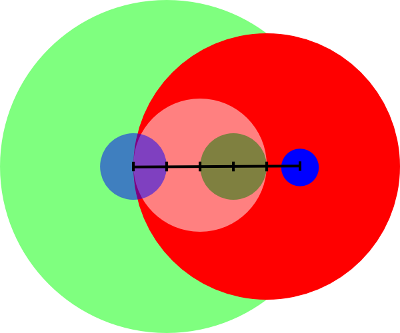

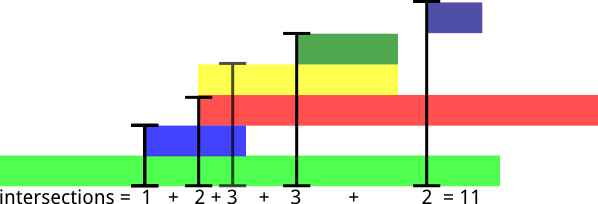

In [35]:
Event = collections.namedtuple('Event', ['x', 'v'])

A = [1, 5, 2, 1, 4, 0]

def solution(A):
    # extract events: disk begins or ends
    events = []
    for x in range(len(A)):
        radius = A[x]
        events.append(Event(x-radius,  1))
        events.append(Event(x+radius, -1))
        
    # sort events by x ascending, then by v descending
    events = sorted(events, key=lambda event: (event.x, -event.v))
    events
    
    sum_intersects = 0
    nb_active_disks = 0
    
    for ev in events:
        if ev.v > 0:
            sum_intersects += nb_active_disks
            nb_active_disks += 1
        else:
            nb_active_disks -= 1
            
        if sum_intersects > 10000000:
            return -1
            
    return sum_intersects

solution(A)

11